# **Feature Selection Module - Feature Selector**

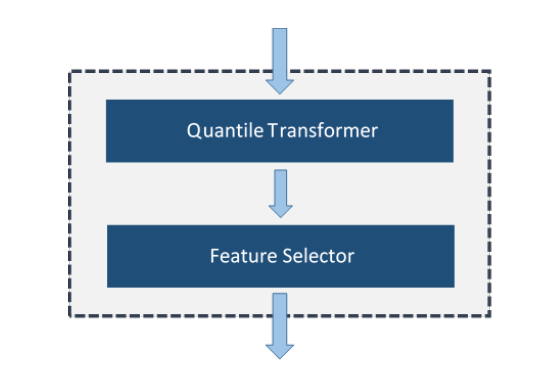

**Description**


*   Feature ranking with recursive feature elimination + cross validation.
*   SVM has selected as the optimal classifier.

# **Original Dataset**

In [52]:
import pandas as pd
from sklearn.preprocessing import QuantileTransformer

# define dataset
df = pd.read_csv('/content/drive/MyDrive/ELOC-SW/features/features_original.csv')
data= df.drop(['feature_class'], axis=1)

trans = QuantileTransformer(n_quantiles=100)

X = trans.fit_transform(data)
y = df['feature_class']

Recursive feature elimination with automatic tuning of the number of features selected with cross-validation.

In [53]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 275


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


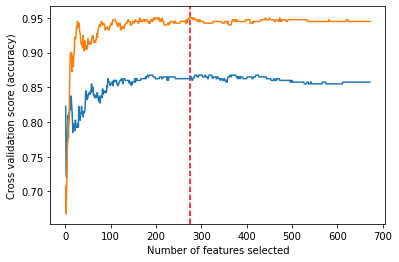

In [54]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.axvline(x = rfecv.n_features_, color = "red",linestyle='--') # Plotting a single vertical line
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [55]:
rfecv_columns=data.columns[rfecv.get_support()]
# df = pd.DataFrame(rfecv_columns,rfecv_columns.ranking_,columns=['Selected Feature','Rank']).sort_values(by='Rank',ascending=True)
df = pd.DataFrame(rfecv_columns,columns=['Selected Feature'])
df

,Selected Feature
0,chroma_stft - 7 - row
1,chroma_stft - 8 - row
2,chroma_stft - 11 - row
3,chroma_cqt - 5 - row
4,chroma_cqt - 8 - row
...,...
270,spectral_centroid - 0 - cd1
271,spectral_bandwidth - 0 - cd1
272,spectral_rolloff - 0 - cd1
273,poly_features - 0 - cd1


In [56]:
import numpy as np

# feature rankings
ranking = pd.DataFrame({'Feature': data.columns})
ranking['Rank'] = np.asarray(rfecv.ranking_)
ranking.sort_values('Rank', inplace=True)
ranking

,Feature,Rank
671,poly_features - 1 - cd1,1
250,poly_features - 0 - rm_approx,1
249,spectral_rolloff - 0 - rm_approx,1
504,zero_crossing_rate - 0 - cd2,1
505,chroma_stft - 0 - cd2,1
...,...,...
1,chroma_stft - 0 - row,394
225,melspectrogram - 20 - rm_approx,395
134,melspectrogram - 13 - all_recon,396
50,melspectrogram - 13 - row,397


In [57]:
import pickle

filename = '/content/drive/MyDrive/ELOC-SW/feature_selector_original.sav' 
pickle.dump(rfecv, open(filename, 'wb'))

# **Replayed Dataset**

In [58]:
import pandas as pd
from sklearn.preprocessing import QuantileTransformer

# define dataset
df = pd.read_csv('/content/drive/MyDrive/ELOC-SW/features/features_replayed.csv')
data= df.drop(['feature_class'], axis=1)

trans = QuantileTransformer(n_quantiles=100)

X = trans.fit_transform(data)
y = df['feature_class']

Recursive feature elimination with automatic tuning of the number of features selected with cross-validation.

In [59]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 515


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


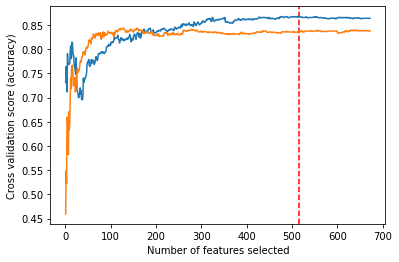

In [60]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.axvline(x = rfecv.n_features_, color = "red",linestyle='--') # Plotting a single vertical line
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

In [61]:
rfecv_columns=data.columns[rfecv.get_support()]
df = pd.DataFrame(rfecv_columns,columns=['Selected Feature'])
df

,Selected Feature
0,zero_crossing_rate - 0 - row
1,chroma_stft - 1 - row
2,chroma_stft - 9 - row
3,chroma_stft - 10 - row
4,chroma_cqt - 0 - row
...,...
510,spectral_contrast - 3 - cd1
511,spectral_contrast - 5 - cd1
512,spectral_rolloff - 0 - cd1
513,poly_features - 0 - cd1


In [62]:
import numpy as np

# feature rankings
ranking = pd.DataFrame({'Feature': data.columns})
ranking['Rank'] = np.asarray(rfecv.ranking_)
ranking.sort_values('Rank', inplace=True)
ranking

,Feature,Rank
0,zero_crossing_rate - 0 - row,1
416,spectral_contrast - 5 - cA3,1
417,spectral_rolloff - 0 - cA3,1
418,poly_features - 0 - cA3,1
419,poly_features - 1 - cA3,1
...,...,...
642,melspectrogram - 17 - cd1,154
501,spectral_rolloff - 0 - cd3,155
232,melspectrogram - 27 - rm_approx,156
3,chroma_stft - 2 - row,157


In [63]:
import pickle

filename = '/content/drive/MyDrive/ELOC-SW/feature_selector_replayed.sav' 
pickle.dump(rfecv, open(filename, 'wb'))